In [3]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers, optimizers

import os
import gc
from timeit import default_timer as timer

In [1]:
train_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/train'
val_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/validation'
test_dir = '/Users/arencarpenter/Desktop/Covid_CT_Classification/Split/test'

In [4]:
train_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(train_dir,
                                                                  target_size = (256,256), 
                                                                  color_mode='grayscale',
                                                                  class_mode='binary')
val_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(val_dir,
                                                                target_size = (256,256), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')
test_img = image.ImageDataGenerator(rescale = 1/255).flow_from_directory(test_dir,
                                                                target_size = (256,256), 
                                                                color_mode='grayscale',
                                                                class_mode='binary')

Found 383 images belonging to 2 classes.
Found 83 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


## Baseline CNN: 2 Conv2D, 1 Dense

In [5]:
# model fit
model = models.Sequential()
model.add(layers.Conv2D(32, 3, activation = 'relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, 3, activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
# compiling models
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy', 'Recall', 'Precision'])

In [7]:
# training
start = timer()
history_baseline = model.fit(train_img, 
                    epochs=20, 
                    validation_data=val_img, 
                    workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/20
12/12 [==============================] - 14s 1s/step - loss: 11.8517 - accuracy: 0.6632 - recall: 0.4348 - precision: 0.5405 - val_loss: 0.3763 - val_accuracy: 0.8193 - val_recall: 0.5333 - val_precision: 0.9412
Epoch 2/20
12/12 [==============================] - 14s 1s/step - loss: 0.3403 - accuracy: 0.8538 - recall: 0.6957 - precision: 0.8727 - val_loss: 0.7229 - val_accuracy: 0.5904 - val_recall: 0.9667 - val_precision: 0.4677
Epoch 3/20
12/12 [==============================] - 15s 1s/step - loss: 0.3330 - accuracy: 0.8616 - recall: 0.7899 - precision: 0.8195 - val_loss: 0.5430 - val_accuracy: 0.6627 - val_recall: 0.9667 - val_precision: 0.5179
Epoch 4/20
12/12 [==============================] - 15s 1s/step - loss: 0.1784 - accuracy: 0.9399 - recall: 0.9348 - precision: 0.9021 - val_loss: 0.3760 - val_accuracy: 0.8072 - val_recall: 0.5667 - val_precision: 0.8500
Epoch 5/20
12/12 [==============================] - 15s 1s/step - loss: 0.1011 - accuracy: 0.9634 - recall: 0.9

In [9]:
scores = model.evaluate(test_img, verbose=1)

3/3 [==============================] - 0s 139ms/step - loss: 0.7861 - accuracy: 0.8333 - recall: 0.7778 - precision: 0.7500


Not bad for a first model with some default hyperparameters. Twenty epochs with this small of a dataset led to overfitting fairly quickly. 

Result: Val_Acc -- 79.5, Val_Loss -- 0.853

Next steps: augment data to generate more data to combat overfitting.

In [14]:
# plot performance
def plot_performance(hist):
    hist_ = hist.history
    epochs = hist.epoch

    plt.plot(epochs, hist_['accuracy'], label='Training Accuracy')
    plt.plot(epochs, hist_['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, hist_['loss'], label='Training loss')
    plt.plot(epochs, hist_['val_loss'], label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.show()

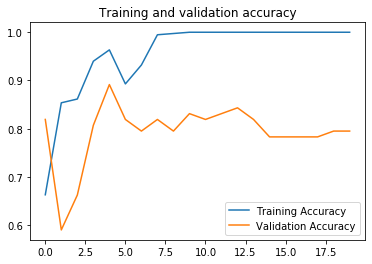

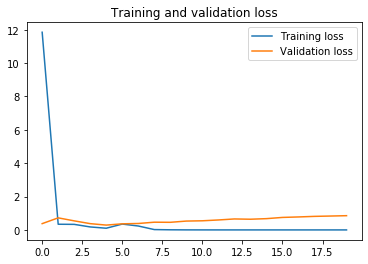

In [15]:
plot_performance(history_baseline)